# Building a Contact Sheet in a Range of Intensities per Color Channel

##### Using the PIL library for Python

Enter the image file location: 


Invalid file location. Using the sample image instead


Enter intensity step as a whole number in range 1-4: 2


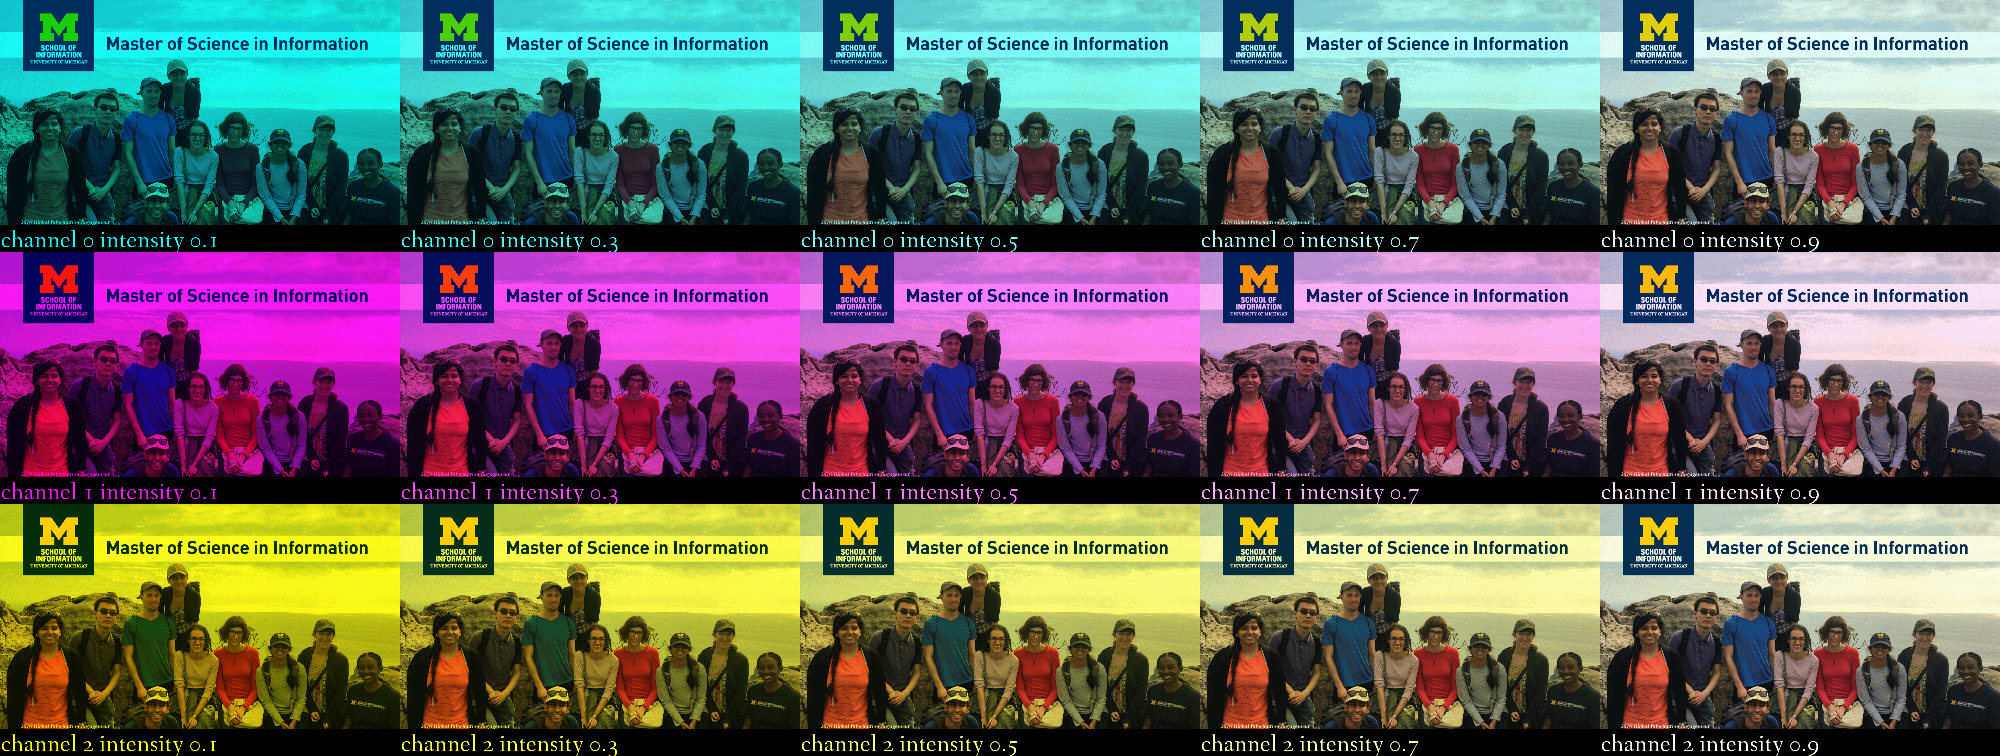

Channels legend: 0 = RED, 1 = GREEN, 2 = BLUE


In [1]:
#import PIL
from PIL import Image
from PIL import ImageDraw as imd
from PIL import ImageFont as imf

# read image and convert to RGB
floc = input('Enter the image file location:')
try : 
    image = Image.open(floc)
except :
    print('Invalid file location. Using the sample image instead')
    image = Image.open('msi_recruitment.gif')
image = image.convert('RGB')

# Setting variables:

# 1. setting the color channels
R, G, B = 0, 1, 2
channels = [R, G, B] 

# 2. setting intensities
try :
    step = int(input('Enter intensity step as a whole number in range 1-4:'))
    assert step in range(1,5)
    steps = list(range(1,11, step)) # making a list of intensities
except :
    print('Invalid step input. Using default step instead.')
    steps = [1, 5, 9] # default list of intensities (1 to 10 scale)
                 
# 3. setting text font using a font file stored in the same directory
try :
    fnt = imf.truetype('fanwood-webfont.ttf', 50) 
except: 
    print('Cannot load font. Please make sure there is a *.ttf font file in the current working directory.')

# Generating the list of 9 images with text
adjusted = []
for ch in channels :
    #for step in range(1,9, step) :
    for step in steps :
        # generating text
        txt = 'channel {} intensity {}'.format(ch, step/10) 
        # generating the black background
        place = Image.new(image.mode, (image.width, int(image.height*1.12))) 
        # adding text to the background
        imd.Draw(place).text((2,image.height), txt, font = fnt) 
        # pasting image onto the background
        place.paste(image, (0, 0)) 
        # implementing intesities in current channel
        source = place.split()
        out = source[ch].point(lambda i: i * (step/10)) 
        source[ch].paste(out)
        img = Image.merge(place.mode, source)
        adjusted.append(img)

# Creating the contact sheet from different channels and intensities
contact_sheet = Image.new(img.mode, (img.width*len(steps), img.height*3))
x = 0
y = 0
for img in adjusted:
    contact_sheet.paste(img, (x, y) )
    if x + img.width == contact_sheet.width:
        x = 0
        y = y + img.height
    else:
        x = x + img.width

# Resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2)))
display(contact_sheet)
print('Channels legend: 0 = RED, 1 = GREEN, 2 = BLUE')

If something goes wrong, please report to mislavsky@yandex.ua